### Variables

**Age**: Edad de la paciente

**Race**: Raza de la paciente

**Marital Status**: Estado civil de la paciente

**T status**: Tamaño o extensión del tumor

**N Stage**: Número o Ubicación de los ganglios comprometidos

**6tth Stage**: 

**Differentiate**: Muestra qué tan desarrolladas están las células del cáncer

**Grade**: Grado determinado del cáncer

**A Stage**: Estado de la diseminación de la enfermedad (Regional)

**Tumor Size**: Tamaño del tumor (mm)

**Estrogen Status**: Estado de la progesterona

**Progesterone Status**: Estado de la progesterona

**Reginol Node Examined**: Ganglios examinados

**Survival Months**: Meses de supervivencia

**State**: Estado actual de la paciente (Sobreviviente o no sobreviviente)

## Inicio del Caso

In [41]:
#TRATAMIENTO DE DATOS
import pandas as pd
import numpy as np
#GRÁFICOS
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans', 'DejaVuSerif', 'OpenSans-Italic']
# import matplotlib.font_manager
# print(matplotlib.font_manager.findSystemFonts(fontpaths=[ '/usr/share/fonts/Open_Sans/static/'], fontext='ttf'))
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram
import plotly.express as px
#PREPARACIÓN DE DATOS
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split
#MODELADO
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble  import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
#BUSQUEDA DE HIPERPARÁMETROS
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#EVALUACIÓN
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

#ADVERTENCIAS
import warnings
warnings.filterwarnings('ignore')

In [42]:
np.random.seed(12)

In [43]:
datos = pd.read_csv('data/datos_medicina.csv')
#datos = pd.read_csv('https://raw.githubusercontent.com/SGiraldoZ/NBs_cientifica/main/data/datos_medicina.csv')
datos

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        Positive   
2     Moderately differentiated     2  Regional          63        Positive   
3         Poorly differentiated     3  Regional          18        Positive   
4         Poorly differentiated     3  Regional          41        Positive   
...                         ...   ...       ...         ...             ...   
4019  Moderately differentiated     2  Regional           9        Positive   
4020  Moderately differentiated     2  Regional          46        Positive   
4021  Moderately differentiated     2  Regional          22        Positive   
4022  Moderately differentiated     2  Regional          44        Positive   
4023  Moderately differentiated     2  Regional          30        Positive   

     Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0               Positive                      24                      1   
1               Positive                      14                      5   
2               Positive                      14                      7   
3               Positive                       2                      1   
4               Positive                       3                      1   
...                  ...                     ...                    ...   
4019            Positive                       1                      1   
4020            Positive                      14                      8   
4021            Negative                      11                      3   
4022            Positive                      11                      1   
4023            Positive                       7                      2   

      Survival Months Status  
0                  60  Alive  
1                  62  Alive  
2                  75  Alive  
3                  84  Alive  
4                  50  Alive  
...               ...    ...  
4019               49  Alive  
4020               69  Alive  
4021               69  Alive  
4022               72  Alive  
4023              100  Alive  

[4024 rows x 16 columns]

# Exploración de Datos

In [44]:
#Identificar cantidad de nulos y tipologías
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [45]:
#Exploración Univariada de datos
datos.describe()

## Por rangos similares se define que no es necesario normalizar. Escalar siempre es recomendable

Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    30.473658               14.357107   
std       8.963134    21.119696                8.099675   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count            4024.000000      4024.000000  
mean                4.158052        71.297962  
std                 5.109331        22.921430  
min                 1.000000         1.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%                 5.000000        90.000000  
max                46.000000       107.000000

In [46]:
datos.describe(include='object')

Race Marital Status T Stage  N Stage 6th Stage  \
count    4024           4024     4024    4024      4024   
unique      3              5        4       3         5   
top     White        Married       T2      N1       IIA   
freq     3413           2643     1786    2732      1305   

                    differentiate Grade   A Stage Estrogen Status  \
count                        4024  4024      4024            4024   
unique                          4     4         2               2   
top     Moderately differentiated     2  Regional        Positive   
freq                         2351  2351      3932            3755   

       Progesterone Status Status  
count                 4024   4024  
unique                   2      2  
top               Positive  Alive  
freq                  3326   3408

### Analisis de distribuciones

<Axes: xlabel='Age', ylabel='Count'>

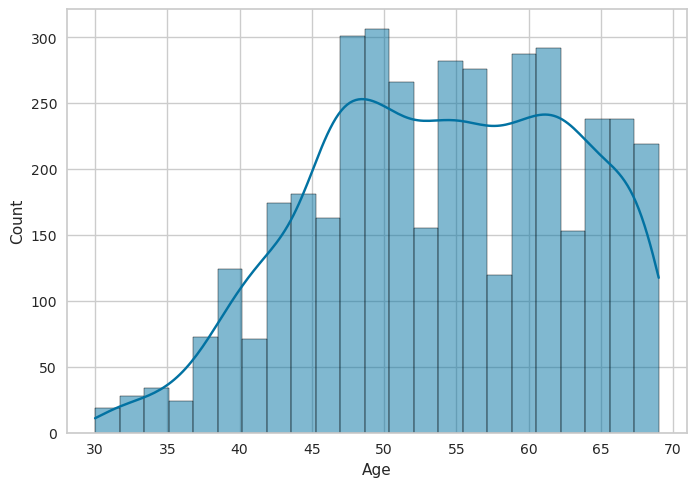

In [47]:
sb.histplot(data = datos, x= 'Age', kde=True)

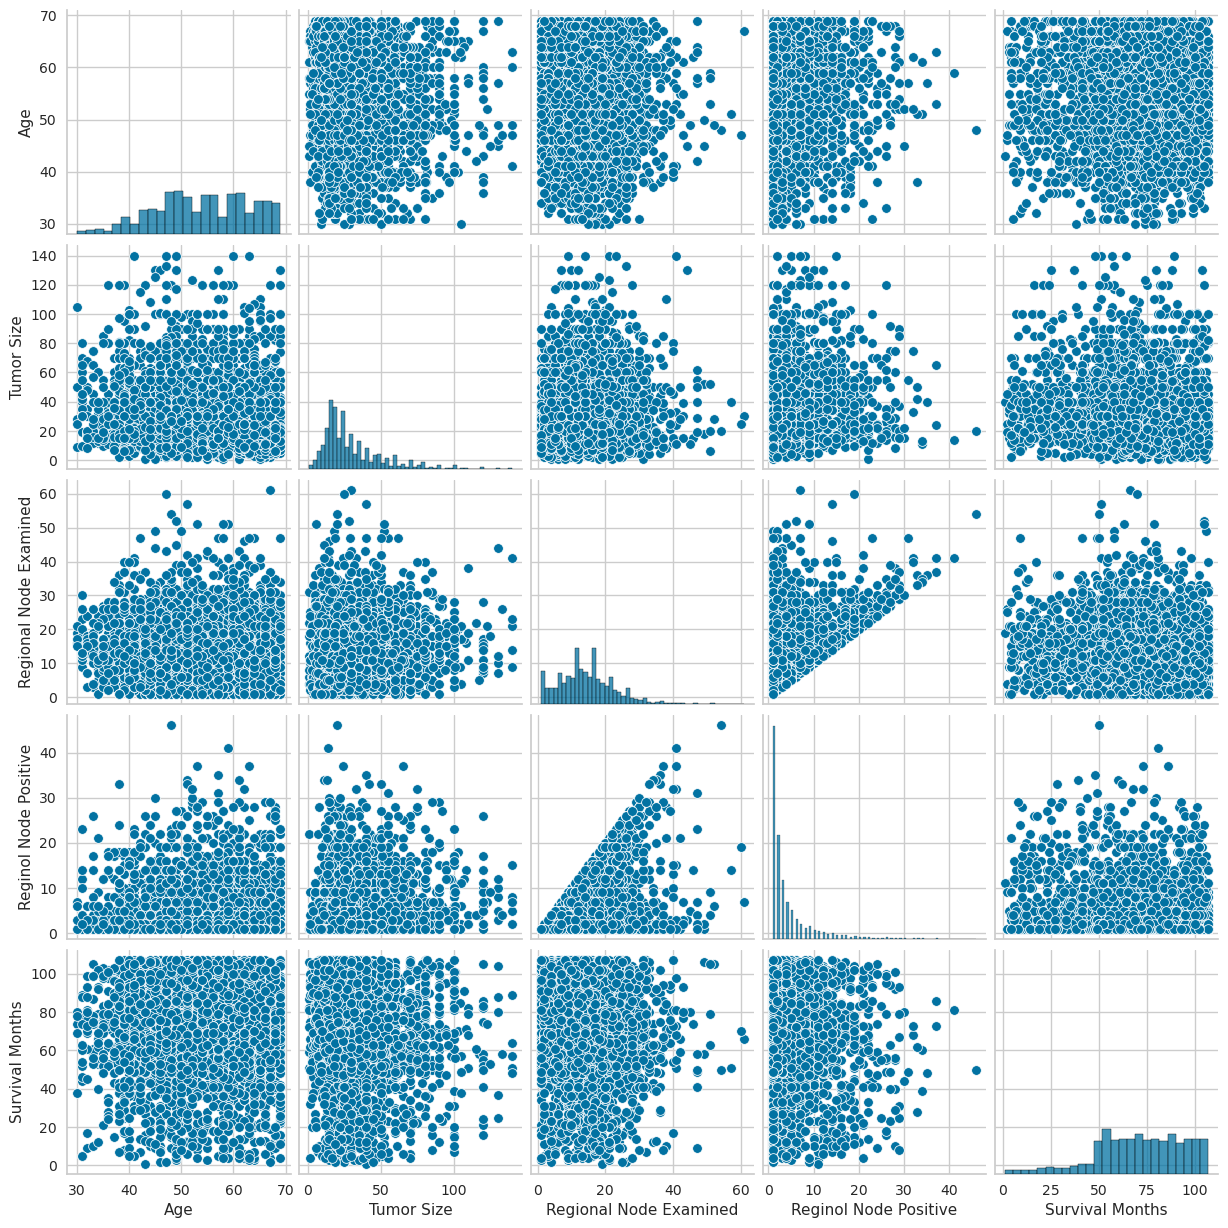

In [48]:
sb.pairplot(data=datos)

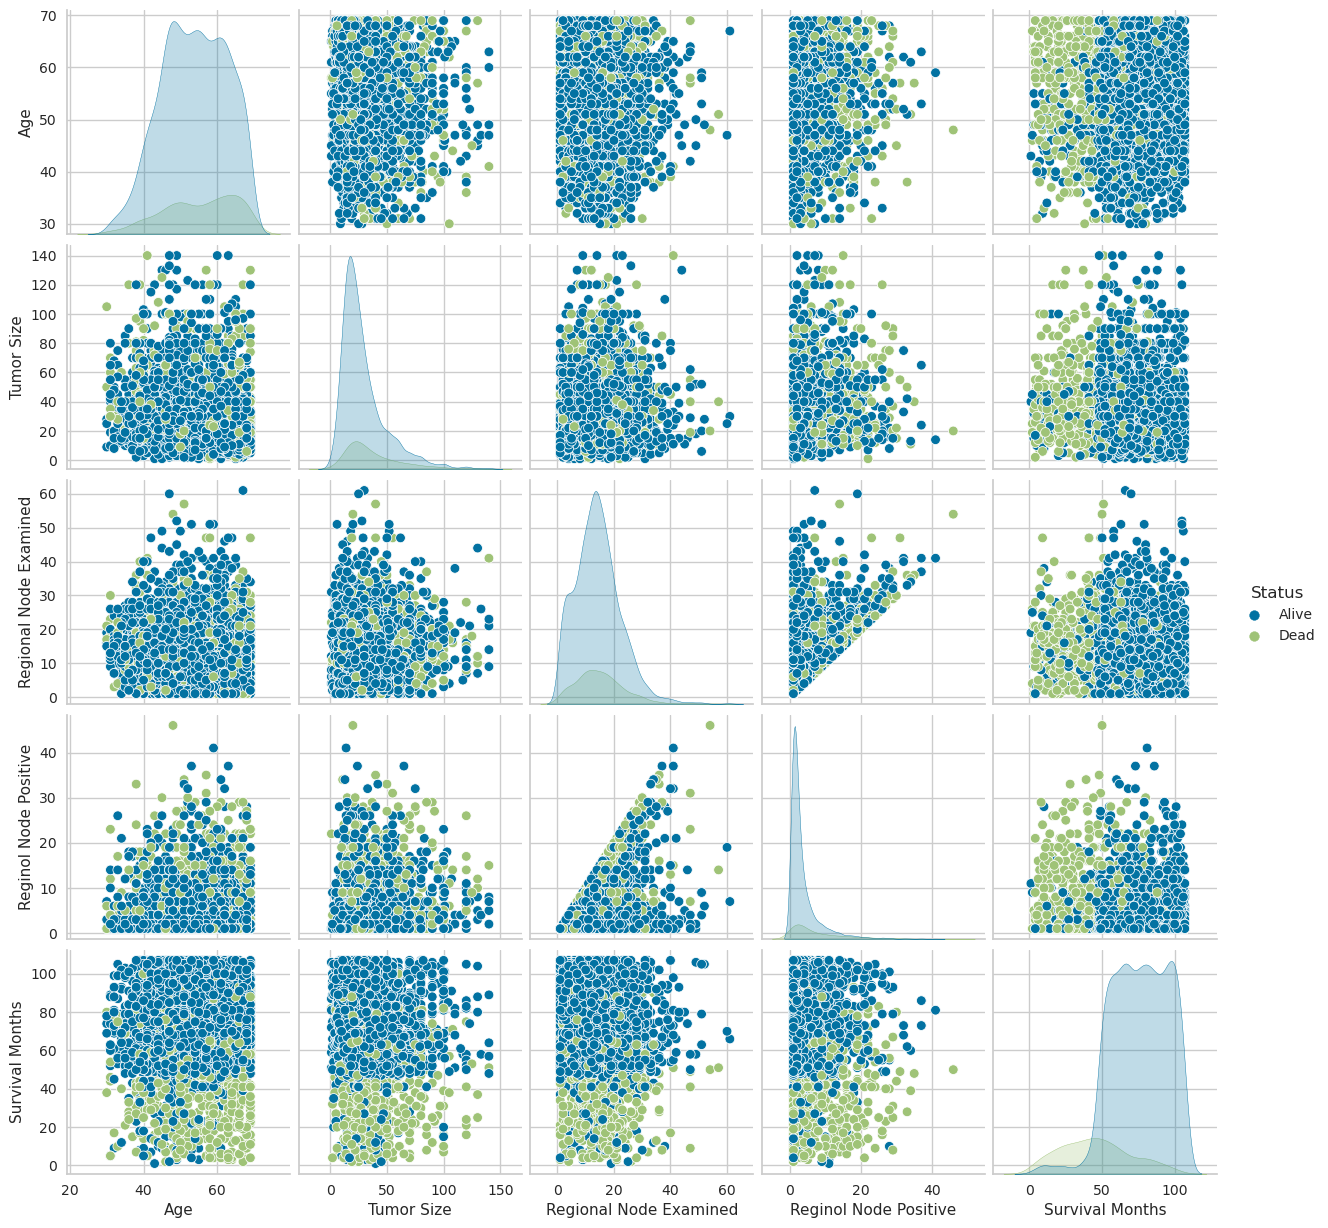

In [49]:
sb.pairplot(data=datos, hue='Status')

### Análisis de Variables Categóricas

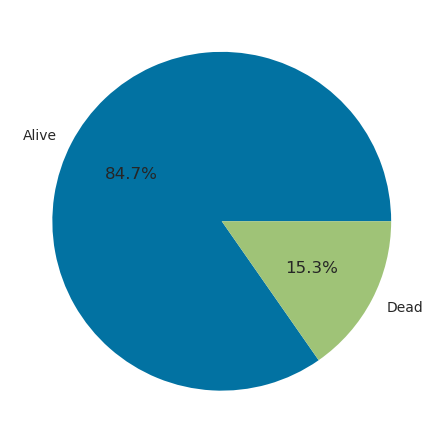

In [50]:
plt.pie(x=datos['Status'].value_counts(), labels= datos['Status'].value_counts().index, autopct='%0.1f%%')
plt.show()

>>#### Posibilidades para acercar entre sí los tamaños de la muestra y evitar biases en el modelo:
>
> - **Sample:** sacar una muestra del grupo más grande para quedar con dos categorías con el mismo número de individuos
>
> - **OverSample:** Tomar elementos de la categoría con pocos individuos, para generar una muestra mayor que sea del mismo tamaño que las otras categorías

([<matplotlib.patches.Wedge at 0x7f089e76c790>,
 [Text(-0.5202397352449826, 0.969201020362768, 'Married'),
  Text(-0.11572145243149949, -1.0938960395975226, 'Single '),
  Text(0.7531520732986899, -0.8017243631609838, 'Divorced'),
  Text(1.064780608017541, -0.2761200043274586, 'Widowed'),
  Text(1.0993212248029012, -0.0386373484836829, 'Separated')],
 [Text(-0.283767128315445, 0.5286551020160553, '65.7%'),
  Text(-0.06312079223536335, -0.596670567053194, '15.3%'),
  Text(0.4108102217992854, -0.4373041980878093, '12.1%'),
  Text(0.5807894225550223, -0.15061091145134103, '5.8%'),
  Text(0.5996297589834005, -0.021074917354736128, '1.1%')])

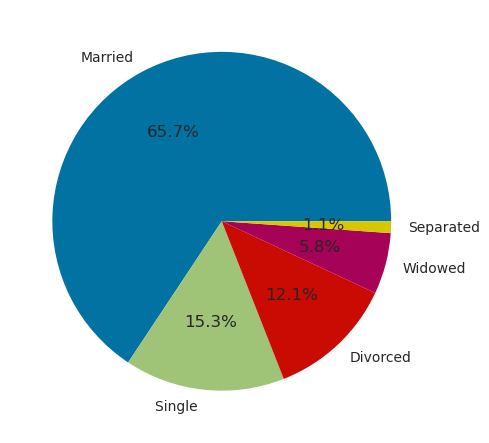

In [51]:
plt.pie(x=datos["Marital Status"].value_counts(), labels = datos['Marital Status'].value_counts().index, autopct='%0.1f%%')

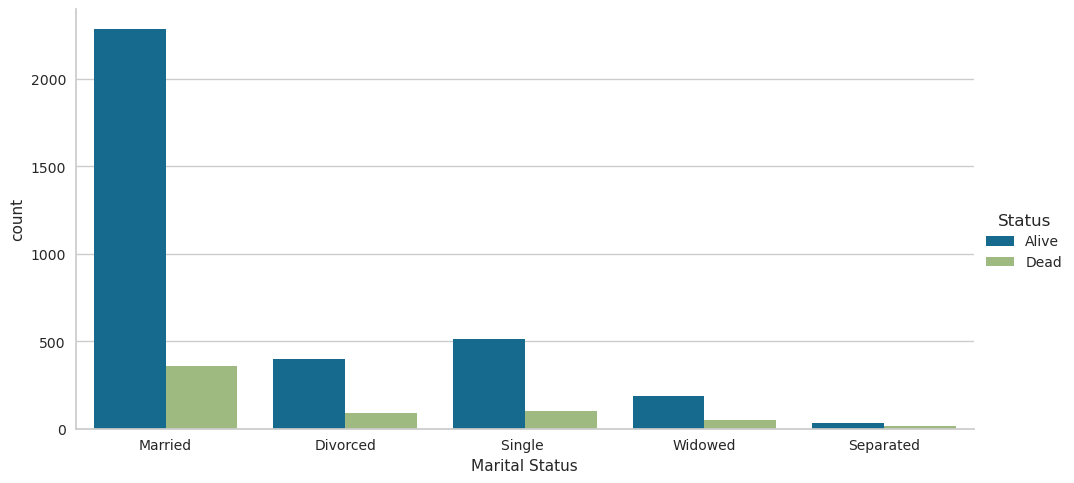

In [52]:
sb.catplot(data = datos, x = 'Marital Status', hue='Status', kind='count', aspect=2)
plt.show()

([<matplotlib.patches.Wedge at 0x7f089e5fae90>,
 [Text(-1.0971638022110561, 0.07894042765135273, 'Regional'),
  Text(1.0971637952820494, -0.07894052395499805, 'Distant')],
 [Text(-0.5984529830242123, 0.043058415082556034, '97.7%'),
  Text(0.5984529792447542, -0.043058467611817114, '2.3%')])

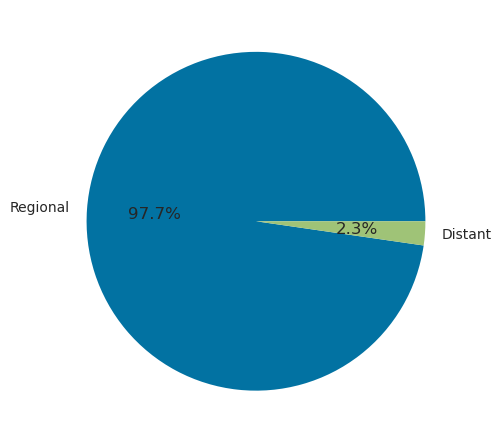

In [53]:
plt.pie(x=datos['A Stage'].value_counts(), labels=datos['A Stage'].value_counts().index, autopct="%0.1f%%")

### Preparación de Datos

In [54]:
datos.drop(['A Stage','Progesterone Status', 'Estrogen Status'], axis=1, inplace=True)
datos.head()

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade  Tumor Size  Regional Node Examined  \
0      Poorly differentiated     3           4                      24   
1  Moderately differentiated     2          35                      14   
2  Moderately differentiated     2          63                      14   
3      Poorly differentiated     3          18                       2   
4      Poorly differentiated     3          41                       3   

   Reginol Node Positive  Survival Months Status  
0                      1               60  Alive  
1                      5               62  Alive  
2                      7               75  Alive  
3                      1               84  Alive  
4                      1               50  Alive

In [55]:
datos_alive = datos[datos['Status']=='Alive']
datos

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade  Tumor Size  Regional Node Examined  \
0         Poorly differentiated     3           4                      24   
1     Moderately differentiated     2          35                      14   
2     Moderately differentiated     2          63                      14   
3         Poorly differentiated     3          18                       2   
4         Poorly differentiated     3          41                       3   
...                         ...   ...         ...                     ...   
4019  Moderately differentiated     2           9                       1   
4020  Moderately differentiated     2          46                      14   
4021  Moderately differentiated     2          22                      11   
4022  Moderately differentiated     2          44                      11   
4023  Moderately differentiated     2          30                       7   

      Reginol Node Positive  Survival Months Status  
0                         1               60  Alive  
1                         5               62  Alive  
2                         7               75  Alive  
3                         1               84  Alive  
4                         1               50  Alive  
...                     ...              ...    ...  
4019                      1               49  Alive  
4020                      8               69  Alive  
4021                      3               69  Alive  
4022                      1               72  Alive  
4023                      2              100  Alive  

[4024 rows x 13 columns]

In [56]:
datos_dead = datos[datos['Status'] == 'Dead']
datos_dead

Age   Race Marital Status T Stage  N Stage 6th Stage  \
7      40  White        Married       T2      N1       IIB   
10     68  White        Widowed       T1      N1       IIA   
40     57  White        Single        T3      N3      IIIC   
46     42  White        Married       T1      N3      IIIC   
64     67  White       Divorced       T1      N1       IIA   
...   ...    ...            ...      ...     ...       ...   
3996   69  White        Married       T1      N2      IIIA   
4003   66  White       Divorced       T1      N2      IIIA   
4004   58  White        Married       T2      N2      IIIA   
4010   59  Black        Single        T2      N1       IIB   
4017   46  White        Married       T2      N1       IIB   

                  differentiate Grade  Tumor Size  Regional Node Examined  \
7     Moderately differentiated     2          30                       9   
10    Moderately differentiated     2          13                       9   
40    Moderately differentiated     2          70                      12   
46    Moderately differentiated     2           9                      15   
64    Moderately differentiated     2          13                      16   
...                         ...   ...         ...                     ...   
3996  Moderately differentiated     2          19                      21   
4003  Moderately differentiated     2          19                      21   
4004  Moderately differentiated     2          24                      19   
4010      Poorly differentiated     3          23                       6   
4017  Moderately differentiated     2          28                       2   

      Reginol Node Positive  Survival Months Status  
7                         1               14   Dead  
10                        1               64   Dead  
40                       12               42   Dead  
46                        2               39   Dead  
64                        3               60   Dead  
...                     ...              ...    ...  
3996                      9               88   Dead  
4003                      7               64   Dead  
4004                      9               65   Dead  
4010                      1               27   Dead  
4017                      1               19   Dead  

[616 rows x 13 columns]

In [57]:
#Submuestreo
datos_Alive_sub = datos_alive.sample(datos_dead.shape[0], replace = True)
datos_Alive_sub

Age   Race Marital Status T Stage  N Stage 6th Stage  \
2214   68  White       Divorced       T2      N1       IIB   
2008   40  White        Married       T1      N1       IIA   
1680   59  White       Divorced       T2      N1       IIB   
3929   68  White        Married       T1      N2      IIIA   
3913   50  White        Single        T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
344    65  White        Married       T2      N2      IIIA   
1535   63  White        Single        T2      N1       IIB   
2877   54  White       Divorced       T2      N1       IIB   
2424   47  Other        Married       T1      N1       IIA   
3851   58  White        Married       T2      N1       IIB   

                  differentiate Grade  Tumor Size  Regional Node Examined  \
2214        Well differentiated     1          34                       7   
2008  Moderately differentiated     2          16                      25   
1680  Moderately differentiated     2          22                      20   
3929      Poorly differentiated     3          17                      12   
3913  Moderately differentiated     2          22                       6   
...                         ...   ...         ...                     ...   
344       Poorly differentiated     3          22                      23   
1535  Moderately differentiated     2          21                       2   
2877  Moderately differentiated     2          25                       8   
2424  Moderately differentiated     2          14                      21   
3851  Moderately differentiated     2          30                       6   

      Reginol Node Positive  Survival Months Status  
2214                      1               83  Alive  
2008                      1               97  Alive  
1680                      1               64  Alive  
3929                      6               72  Alive  
3913                      1              102  Alive  
...                     ...              ...    ...  
344                       5               75  Alive  
1535                      2               83  Alive  
2877                      3               87  Alive  
2424                      1              102  Alive  
3851                      1               82  Alive  

[616 rows x 13 columns]

In [58]:
datos_sub = pd.concat([datos_Alive_sub, datos_dead])
datos_sub.shape

(1232, 13)

In [59]:
datos_sub = datos_sub.reset_index(drop=True)
datos_sub

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White       Divorced       T2      N1       IIB   
1      40  White        Married       T1      N1       IIA   
2      59  White       Divorced       T2      N1       IIB   
3      68  White        Married       T1      N2      IIIA   
4      50  White        Single        T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
1227   69  White        Married       T1      N2      IIIA   
1228   66  White       Divorced       T1      N2      IIIA   
1229   58  White        Married       T2      N2      IIIA   
1230   59  Black        Single        T2      N1       IIB   
1231   46  White        Married       T2      N1       IIB   

                  differentiate Grade  Tumor Size  Regional Node Examined  \
0           Well differentiated     1          34                       7   
1     Moderately differentiated     2          16                      25   
2     Moderately differentiated     2          22                      20   
3         Poorly differentiated     3          17                      12   
4     Moderately differentiated     2          22                       6   
...                         ...   ...         ...                     ...   
1227  Moderately differentiated     2          19                      21   
1228  Moderately differentiated     2          19                      21   
1229  Moderately differentiated     2          24                      19   
1230      Poorly differentiated     3          23                       6   
1231  Moderately differentiated     2          28                       2   

      Reginol Node Positive  Survival Months Status  
0                         1               83  Alive  
1                         1               97  Alive  
2                         1               64  Alive  
3                         6               72  Alive  
4                         1              102  Alive  
...                     ...              ...    ...  
1227                      9               88   Dead  
1228                      7               64   Dead  
1229                      9               65   Dead  
1230                      1               27   Dead  
1231                      1               19   Dead  

[1232 rows x 13 columns]

In [60]:
datos_sub.describe()

Age   Tumor Size  Regional Node Examined  \
count  1232.000000  1232.000000             1232.000000   
mean     54.496753    33.005682               14.393669   
std       9.243172    22.589203                8.340639   
min      30.000000     1.000000                1.000000   
25%      47.000000    18.000000                9.000000   
50%      55.000000    25.000000               14.000000   
75%      62.000000    40.000000               19.000000   
max      69.000000   140.000000               57.000000   

       Reginol Node Positive  Survival Months  
count            1232.000000      1232.000000  
mean                5.470779        61.086039  
std                 6.395504        26.966611  
min                 1.000000         2.000000  
25%                 1.000000        42.750000  
50%                 3.000000        62.000000  
75%                 7.000000        82.000000  
max                46.000000       107.000000

In [61]:
datos_sub.describe(include='object')

Race Marital Status T Stage  N Stage 6th Stage  \
count    1232           1232     1232    1232      1232   
unique      3              5        4       3         5   
top     White        Married       T2      N1      IIIA   
freq     1038            780      564     710       337   

                    differentiate Grade Status  
count                        1232  1232   1232  
unique                          4     4      2  
top     Moderately differentiated     2  Alive  
freq                          682   682    616

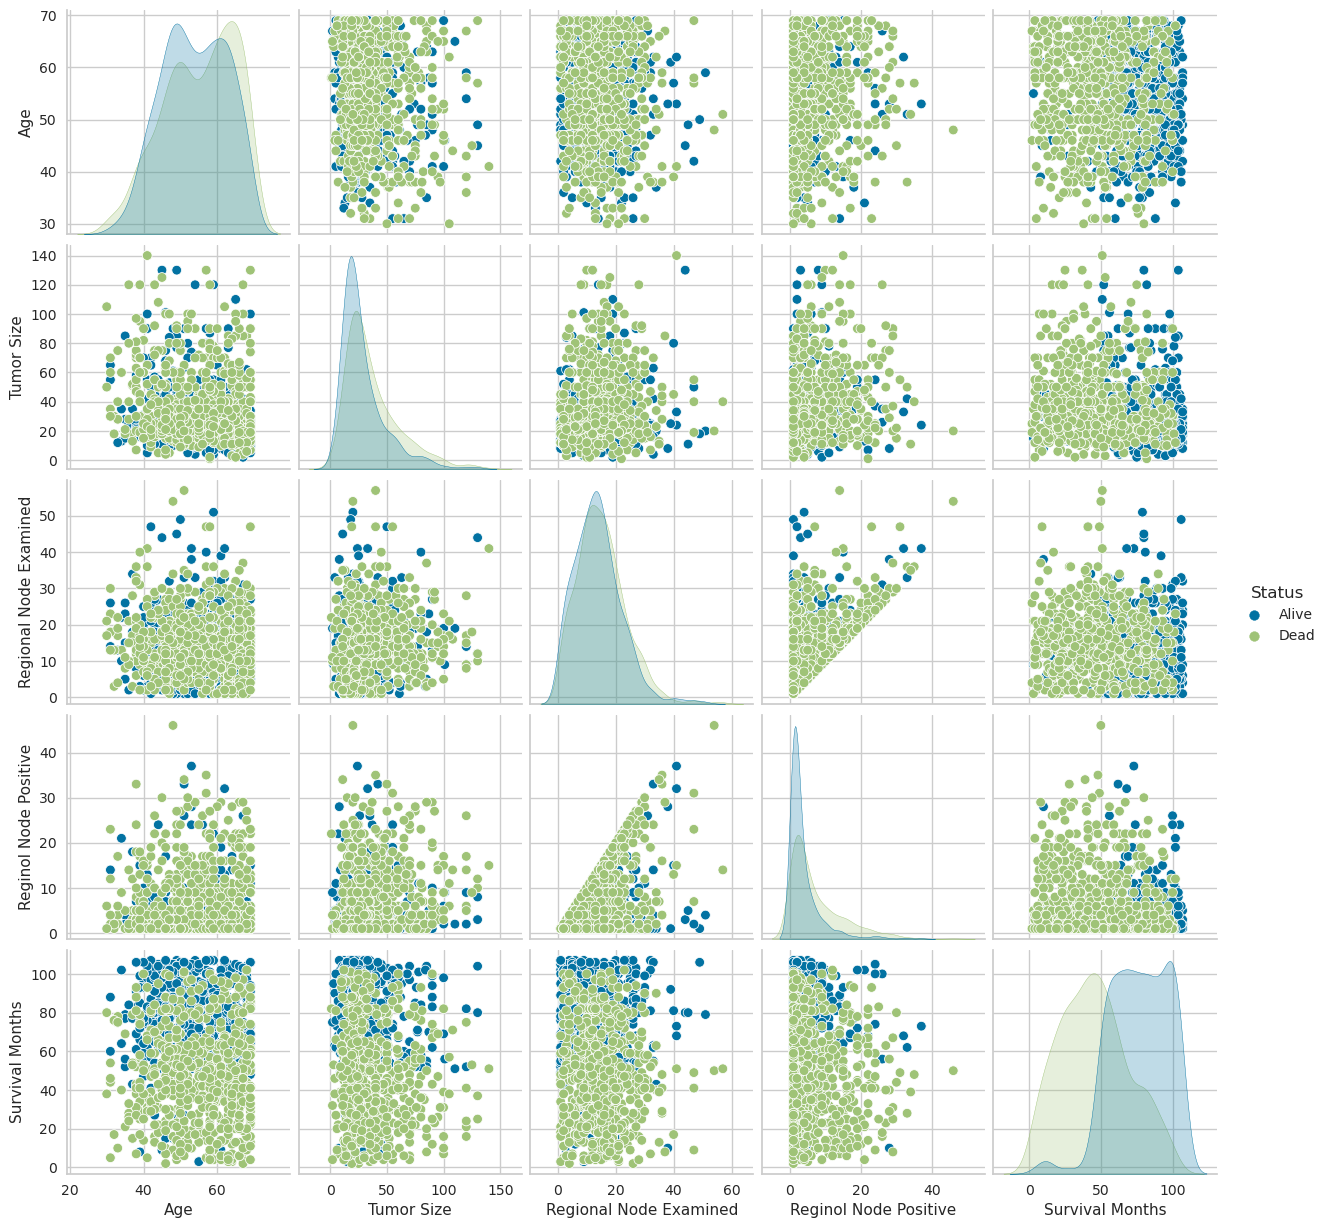

In [62]:
sb.pairplot(data=datos_sub, hue='Status')

In [63]:
#Remuestreo

datos_dead_re = datos_dead.sample(datos_alive.shape[0], replace=True)
datos_dead_re.shape

(3408, 13)

In [64]:
datos_re = pd.concat([datos_alive, datos_dead_re])
datos_re.shape

(6816, 13)

In [65]:
datos_re = datos_re.reset_index(drop=True)
datos_re.describe()

Age   Tumor Size  Regional Node Examined  \
count  6816.000000  6816.000000             6816.000000   
mean     54.640112    33.347711               14.513644   
std       9.315551    22.596398                8.149382   
min      30.000000     1.000000                1.000000   
25%      48.000000    18.000000                9.000000   
50%      55.000000    25.000000               14.000000   
75%      63.000000    41.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count             6816.00000      6816.000000  
mean                 5.36429        60.471391  
std                  6.24431        26.735443  
min                  1.00000         1.000000  
25%                  1.00000        41.000000  
50%                  3.00000        61.000000  
75%                  7.00000        82.000000  
max                 46.00000       107.000000

In [66]:
datos.describe(include='object')

Race Marital Status T Stage  N Stage 6th Stage  \
count    4024           4024     4024    4024      4024   
unique      3              5        4       3         5   
top     White        Married       T2      N1       IIA   
freq     3413           2643     1786    2732      1305   

                    differentiate Grade Status  
count                        4024  4024   4024  
unique                          4     4      2  
top     Moderately differentiated     2  Alive  
freq                         2351  2351   3408

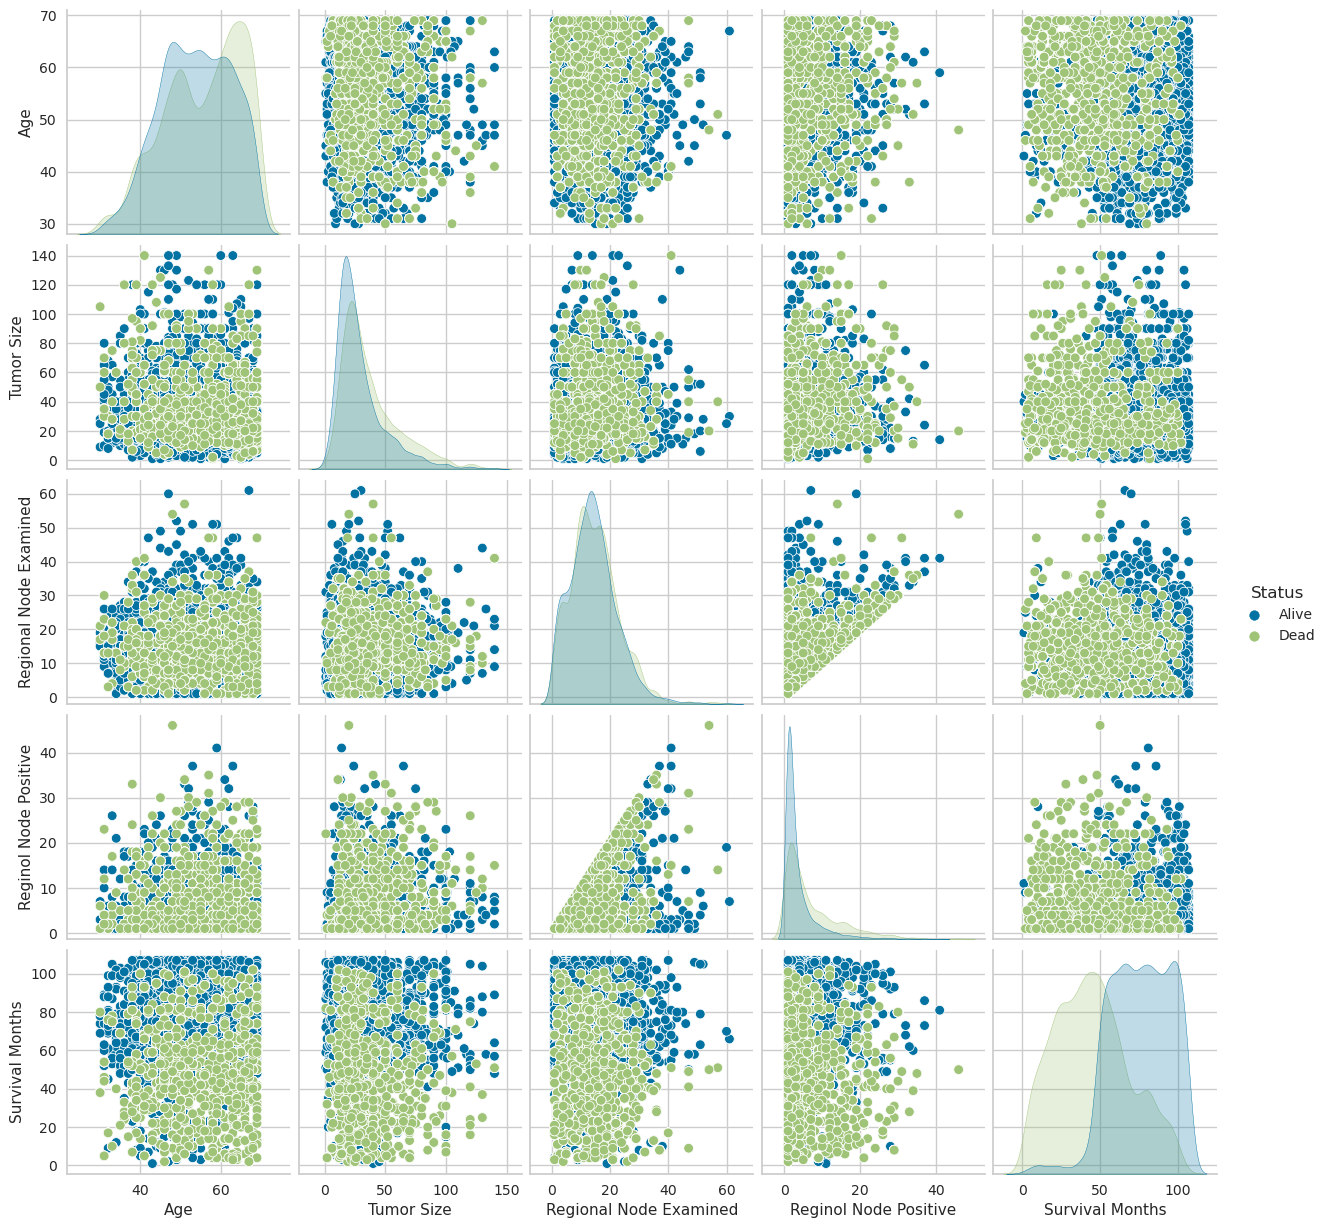

In [67]:
sb.pairplot(data=datos_re, hue='Status')

In [68]:
#Transformation pipeline

num_cols = datos_re.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = datos_re.drop('Status', axis=1).select_dtypes(include=['object']).columns.to_list()
y_cols = datos_re[['Status']].columns.to_list()

num_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
y_transformer = Pipeline(steps=[('Ordinal', OrdinalEncoder())])

preprocesador = ColumnTransformer(transformers = [
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols),
    ('ord', y_transformer, y_cols)
], remainder='passthrough')

set_config(display='diagram')
preprocesador

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Age', 'Tumor Size', 'Regional Node Examined',
                                  'Reginol Node Positive', 'Survival Months']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Race', 'Marital Status', 'T Stage ',
                                  'N Stage', '6th Stage', 'differentiate',
                                  'Grade']),
                                ('ord',
                                 Pipeline(steps=[('Ordinal',
                                                  OrdinalEncoder())]),
                                 ['Status'])])

In [69]:
datos_pre = preprocesador.fit_transform(datos_re)
cod_cat = preprocesador.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols)
labels = np.concatenate([num_cols, cod_cat, y_cols])
datos_pro = pd.DataFrame(datos_pre, columns = labels)
datos_pro

Age  Tumor Size  Regional Node Examined  Reginol Node Positive  \
0     0.974359    0.021583                0.383333               0.000000   
1     0.512821    0.244604                0.216667               0.088889   
2     0.717949    0.446043                0.216667               0.133333   
3     0.717949    0.122302                0.016667               0.000000   
4     0.435897    0.287770                0.033333               0.000000   
...        ...         ...                     ...                    ...   
6811  0.512821    0.115108                0.266667               0.311111   
6812  0.897436    0.266187                0.033333               0.044444   
6813  0.820513    0.079137                0.033333               0.000000   
6814  0.846154    0.244604                0.033333               0.000000   
6815  0.923077    0.136691                0.133333               0.022222   

      Survival Months  Race_Black  Race_Other  Race_White  \
0            0.556604         0.0         0.0         1.0   
1            0.575472         0.0         0.0         1.0   
2            0.698113         0.0         0.0         1.0   
3            0.783019         0.0         0.0         1.0   
4            0.462264         0.0         0.0         1.0   
...               ...         ...         ...         ...   
6811         0.311321         1.0         0.0         0.0   
6812         0.915094         0.0         0.0         1.0   
6813         0.528302         0.0         0.0         1.0   
6814         0.886792         0.0         0.0         1.0   
6815         0.452830         0.0         0.0         1.0   

      Marital Status_Divorced  Marital Status_Married  ...  6th Stage_IIIC  \
0                         0.0                     1.0  ...             0.0   
1                         0.0                     1.0  ...             0.0   
2                         1.0                     0.0  ...             1.0   
3                         0.0                     1.0  ...             0.0   
4                         0.0                     1.0  ...             0.0   
...                       ...                     ...  ...             ...   
6811                      0.0                     1.0  ...             1.0   
6812                      0.0                     1.0  ...             0.0   
6813                      0.0                     1.0  ...             0.0   
6814                      0.0                     1.0  ...             0.0   
6815                      0.0                     1.0  ...             0.0   

      differentiate_Moderately differentiated  \
0                                         0.0   
1                                         1.0   
2                                         1.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
6811                                      1.0   
6812                                      1.0   
6813                                      0.0   
6814                                      1.0   
6815                                      1.0   

      differentiate_Poorly differentiated  differentiate_Undifferentiated  \
0                                     1.0                             0.0   
1                                     0.0                             0.0   
2                                     0.0                             0.0   
3                                     1.0                             0.0   
4                                     1.0                             0.0   
...                                   ...                             ...   
6811                                  0.0                             0.0   
6812                                  0.0                             0.0   
6813                                  1.0                             0.0   
6814                                  0.0                

## Fase De Entrenamiento

> Se separan los datos en x_entr, y_entr para entrenar. Y dos subgrupos para probar

![Imagen del tablero](data/train_prueba.jpeg)


In [70]:
# Separación de datos

x = datos_pro.drop('Status', axis = 1)
y = datos_pro['Status']

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9)
x_train

Age  Tumor Size  Regional Node Examined  Reginol Node Positive  \
6457  0.205128    0.330935                0.200000               0.044444   
3004  0.538462    0.057554                0.150000               0.000000   
4027  0.897436    0.115108                0.183333               0.066667   
3834  0.230769    0.208633                0.133333               0.000000   
592   0.410256    0.208633                0.416667               0.111111   
...        ...         ...                     ...                    ...   
6664  1.000000    0.280576                0.183333               0.044444   
69    0.923077    0.172662                0.166667               0.066667   
6016  1.000000    0.129496                0.333333               0.177778   
303   0.435897    0.107914                0.033333               0.000000   
6440  0.641026    0.151079                0.383333               0.511111   

      Survival Months  Race_Black  Race_Other  Race_White  \
6457         0.396226         1.0         0.0         0.0   
3004         0.584906         0.0         0.0         1.0   
4027         0.613208         0.0         0.0         1.0   
3834         0.226415         1.0         0.0         0.0   
592          0.433962         0.0         0.0         1.0   
...               ...         ...         ...         ...   
6664         0.264151         0.0         0.0         1.0   
69           0.735849         0.0         0.0         1.0   
6016         0.820755         0.0         0.0         1.0   
303          0.707547         0.0         0.0         1.0   
6440         0.433962         0.0         0.0         1.0   

      Marital Status_Divorced  Marital Status_Married  ...  6th Stage_IIIB  \
6457                      0.0                     0.0  ...             0.0   
3004                      0.0                     1.0  ...             0.0   
4027                      0.0                     1.0  ...             0.0   
3834                      1.0                     0.0  ...             0.0   
592                       0.0                     0.0  ...             0.0   
...                       ...                     ...  ...             ...   
6664                      0.0                     1.0  ...             0.0   
69                        0.0                     0.0  ...             0.0   
6016                      0.0                     1.0  ...             0.0   
303                       0.0                     1.0  ...             0.0   
6440                      0.0                     1.0  ...             0.0   

      6th Stage_IIIC  differentiate_Moderately differentiated  \
6457             0.0                                      0.0   
3004             0.0                                      1.0   
4027             0.0                                      1.0   
3834             0.0                                      1.0   
592              0.0                                      1.0   
...              ...                                      ...   
6664             0.0                                      1.0   
69               0.0                                      1.0   
6016             0.0                                      1.0   
303              0.0                                      0.0   
6440             1.0                                      0.0   

      differentiate_Poorly differentiated  differentiate_Undifferentiated  \
6457                                  1.0                             0.0   
3004                                  0.0                             0.0   
4027                                  0.0                             0.0   
3834                                  0.0                             0.0   
592                                   0.0                             0.0   
...                                   ...                             ...   
6664                                  0.0                             0.0   
69                 

### Posibles Modelos Para Clasificación

- **Regresión Lineal**:

    No es inicialmente viable para clasificación. Se ajusta en una logística para este tipo de problemas

- **Regresión Logística**: 

    Trata de modelar la probablidad de una variable cualitativa *binaria*. Valor limitante para cada categoría es 0.5 (siempre aproxima a 0 o 1)

    >> **Hiperparámetros De Lineal (Aplicado en Logística)**:
    >>> Regularización: Limita el impacto de las variables poco importantes
    >>> - *Lasso*: Asigna 0 a aquellas variables que no aportan información
    >>> - *Ridge*: Disminuye el impacto de las variables poco importantes
    >>> - *Elasticnet*: Mezcla de las otras dos regularizaciones
    >>>
    >>> Solver: Cada solver permite algunas regularizaciones. Es el otro hiperparámetro
    >>> - Lbfgs(L2)
    >>> - Lblinear (L1 y L2)
    >>> - Newton - cg (L2)
    >>> - Sg (L2)
    >>> - Saga (L1, L2, Elasticnet)


## Modelado
### Regresión Logística

In [72]:
modelo_1 = LogisticRegression(solver='saga')#Solo saga permite probar las 3 regularizaciones
modelo_1.fit(x_train, y_train)

LogisticRegression(solver='saga')

### Evaluación Del Modelo:

- Accuracy Score: Predicciones correctas / predicciones totales

$$ accuracy =  \frac{\text{number of correct predictions}}{\text{total number of predictions}} $$

- Confusion Matrix: 
    Se construye una matriz, un eje son las clases de predicción y el otro las clases reales
    
        Se busca en general minimizar un valor en específico
<center>

Predicted | Actual |    | 
------- | -------- |----|
--------| Cancer | Not Cancer |
Cancer | True Positive (TP) | False Negative (FN)
Not Cancer | False Positive (FP) | True Negative (TN)

</center>

- Precisión: Es la capacidad de predecir positivos del modelo

$$ precisión = \frac{\text{True Positives}+\text{False Positives}}{\text{Total Predicciones}} $$

- Recall:

$$ Recall = \frac{\text{True Positives}+\text{False Negatives}}{\text{Total Predicciones}} $$

- FB Score: POR TERMINAR

$$ \text{FB}_{\text{score}} = (1+\beta^2)*\frac{\text{Precision}*\text{Recall}}{(1+\beta^2) * \text{Precision} + \text{Recall}} $$

In [73]:
y_pred_train_1 = modelo_1.predict(x_train)
y_pred_test_1 = modelo_1.predict(x_test)

Métricas en el Entrenamiento

In [74]:
accuracy_train_1 = accuracy_score(y_train, y_pred_train_1)
matrix_train_1 = confusion_matrix(y_train, y_pred_train_1)
f1_train_1 = f1_score(y_train, y_pred_train_1)

The train accuracy of the model is 0.7970329312031301
The train f1_score of the model is 0.7942488844819039


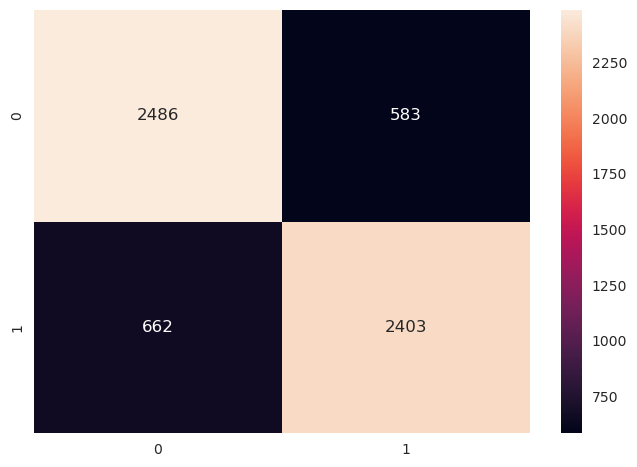

In [75]:
print(f'The train accuracy of the model is {accuracy_train_1}')
print(f'The train f1_score of the model is {f1_train_1}')

sb.heatmap(matrix_train_1, annot = True, fmt = 'd')
plt.show()

Metricas en pruebas

In [76]:
accuracy_test_1 = accuracy_score(y_test, y_pred_test_1)
matrix_test_1 = confusion_matrix(y_test, y_pred_test_1)
f1_test_1 = f1_score(y_test, y_pred_test_1)

The test accuracy of the model is 0.7903225806451613
The test f1_score of the model is 0.7936507936507936


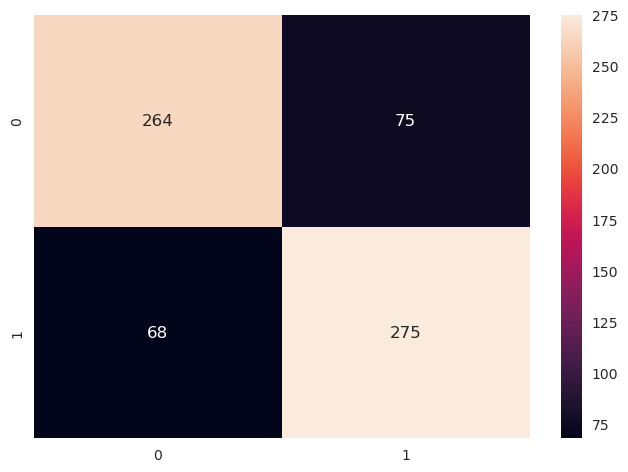

In [77]:
print(f'The test accuracy of the model is {accuracy_test_1}')
print(f'The test f1_score of the model is {f1_test_1}')

sb.heatmap(matrix_test_1, annot = True, fmt = 'd')
plt.show()

## Salud Del Modelo

### **Ajustado**

$$ \text{Accuracy Entrenamiento} \approx \text{Accuracy Prueba} \rightarrow 1 $$

### **Sub Ajustado**

$$ \text{Accuracy Entrenamiento} \approx \text{Accuracy Prueba} \lt 0.5 $$

### **Sobre Ajustado**

$$ \text{Accuracy Entrenamiento} \gt\gt\gt \text{Accuracy Prueba}  $$

## Validación Cruzada (Búsqueda de hiperparámetros)
Permite separar los datos de entrenamiento para probar el modelo con distintos hiperparámetros para encontrar el mejor modelo posible.
Asegurando el no sobre ajuste

In [78]:
hiper_grid = {'penalty':['l1', 'l2', 'elasticnet', 'None'],
              'C': [0.0001*10**n for n in range(8)]}

In [79]:
#Búsqueda exhaustiva
classifier = GridSearchCV(estimator = modelo_1,
                        param_grid= hiper_grid,
                        cv = 5)

classifier.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                               1000.0],
                         'penalty': ['l1', 'l2', 'elasticnet', 'None']})

In [80]:
validation = pd.concat([pd.DataFrame(classifier.cv_results_['params']),
                        pd.DataFrame(classifier.cv_results_['mean_test_score'],
                                    columns=['Accuracy'])], axis=1)

validation.sort_values('Accuracy', ascending=False)

C     penalty  Accuracy
21    10.0000          l2  0.796703
24   100.0000          l1  0.796215
25   100.0000          l2  0.796215
28  1000.0000          l1  0.796052
29  1000.0000          l2  0.796052
20    10.0000          l1  0.795888
17     1.0000          l2  0.795237
16     1.0000          l1  0.795073
13     0.1000          l2  0.792466
12     0.1000          l1  0.790835
8      0.0100          l1  0.776489
9      0.0100          l2  0.750894
5      0.0010          l2  0.680465
1      0.0001          l2  0.661882
0      0.0001          l1  0.500163
4      0.0010          l1  0.499837
2      0.0001  elasticnet       NaN
3      0.0001        None       NaN
6      0.0010  elasticnet       NaN
7      0.0010        None       NaN
10     0.0100  elasticnet       NaN
11     0.0100        None       NaN
14     0.1000  elasticnet       NaN
15     0.1000        None       NaN
18     1.0000  elasticnet       NaN
19     1.0000        None       NaN
22    10.0000  elasticnet       NaN
23    10.0000        None       NaN
26   100.0000  elasticnet       NaN
27   100.0000        None       NaN
30  1000.0000  elasticnet       NaN
31  1000.0000        None       NaN

In [81]:
##Buscar valores cerca a 10
hiper_grid_2 = {'penalty':['l1', 'l2', 'elasticnet', 'None'],
              'C': [n for n in range(10,35)]}

classifier2 = GridSearchCV(estimator = modelo_1,
                        param_grid= hiper_grid,
                        cv = 5)

classifier2.fit(x_train, y_train)

validation2 = pd.concat([pd.DataFrame(classifier2.cv_results_['params']),
                        pd.DataFrame(classifier2.cv_results_['mean_test_score'],
                                    columns=['Accuracy'])], axis=1)

validation2.sort_values('Accuracy', ascending=False)

C     penalty  Accuracy
21    10.0000          l2  0.796703
24   100.0000          l1  0.796215
25   100.0000          l2  0.796215
28  1000.0000          l1  0.796052
29  1000.0000          l2  0.796052
20    10.0000          l1  0.795888
17     1.0000          l2  0.795237
16     1.0000          l1  0.795073
13     0.1000          l2  0.792466
12     0.1000          l1  0.790672
8      0.0100          l1  0.776489
9      0.0100          l2  0.751057
5      0.0010          l2  0.680465
1      0.0001          l2  0.661882
0      0.0001          l1  0.500163
4      0.0010          l1  0.500163
2      0.0001  elasticnet       NaN
3      0.0001        None       NaN
6      0.0010  elasticnet       NaN
7      0.0010        None       NaN
10     0.0100  elasticnet       NaN
11     0.0100        None       NaN
14     0.1000  elasticnet       NaN
15     0.1000        None       NaN
18     1.0000  elasticnet       NaN
19     1.0000        None       NaN
22    10.0000  elasticnet       NaN
23    10.0000        None       NaN
26   100.0000  elasticnet       NaN
27   100.0000        None       NaN
30  1000.0000  elasticnet       NaN
31  1000.0000        None       NaN

#### Validación Cruzada (Aleatorizada, no exhaustiva)

In [82]:
classifier_r = RandomizedSearchCV(estimator = modelo_1,
                                  param_distributions = hiper_grid,
                                  n_iter = 10, cv = 5)

In [83]:
classifier_r.fit(x_train, y_train)

validation_r = pd.concat([pd.DataFrame(classifier_r.cv_results_['params']),
                        pd.DataFrame(classifier_r.cv_results_['mean_test_score'],
                                    columns=['Accuracy'])], axis=1)

validation_r.sort_values('Accuracy', ascending=False)

penalty          C  Accuracy
3          l1   100.0000  0.796215
0          l1     1.0000  0.795399
8          l1     0.0100  0.776489
5          l2     0.0001  0.661882
1        None     0.0100       NaN
2        None    10.0000       NaN
4        None  1000.0000       NaN
6  elasticnet    10.0000       NaN
7  elasticnet     1.0000       NaN
9        None     0.1000       NaN

In [84]:
modelo_1_final = classifier.best_estimator_
modelo_1_final

LogisticRegression(C=10.0, solver='saga')

In [85]:
y_pred_test_1_final = modelo_1_final.predict(x_test)
accuracy_test_1_final = accuracy_score(y_test, y_pred_test_1_final)
matrix_test_1_final = confusion_matrix(y_test, y_pred_test_1_final)
f1_test_1_final = f1_score(y_test, y_pred_test_1_final)

The final test accuracy of the model is 0.7903225806451613
The final test f1_score of the model is 0.7942446043165466


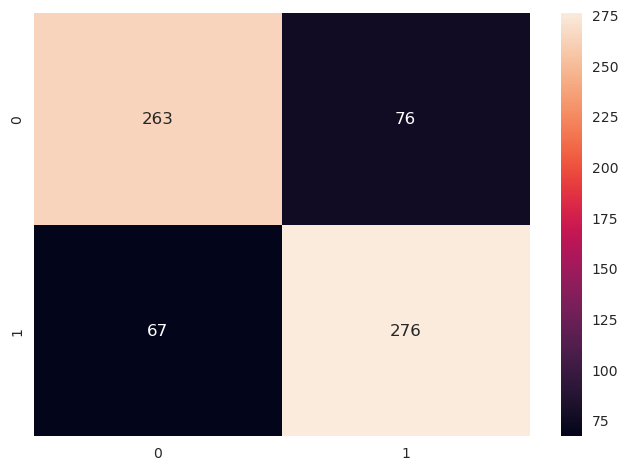

In [86]:
print(f'The final test accuracy of the model is {accuracy_test_1_final}')
print(f'The final test f1_score of the model is {f1_test_1_final}')

sb.heatmap(matrix_test_1_final, annot = True, fmt = 'd')
plt.show()

##Pretty shitty model tbh

## Máquinas De Soporte Vectorial
Es un separador lineal:

A través de los datos x trata de encontrar lineas que separarn áreas de las distintas posibles clasficaciones.

### MSV No Lineal

Cuando no hay tendencias claras se pueden aumentar las dimensiones de los datos a través de un Kernel

#### Hiperparámetros:

- **Penalización (C)**:

Con  C más grande, frontera pequeña (Modelo ácido)

Con  C más pequeña, frontera grande (Modelo laxo) 

- **Kernel** (Opcion de kernel, cada kernel a su vez tiene otros parámetros):

Define cómo se realiza el aumento de dimensiones.

- Polinomio

- Gaussian Radial Basis Function

- Laplacian

- Thin-plate spline

- Sigmoid




In [87]:
#Búsqueda de hiperparámetros de una vez

modelo_2 = SVC()

hiperparam_grid = {'C': [0.0001, 0.001, 0.01, 1, 10, 15, 20],
                    'kernel': ['linear','poly', 'rbf', 'sigmoid'],
                    'degree': [n for n in range(2,6)]
                }

In [88]:
classifier_e = GridSearchCV(estimator = modelo_2,
                            param_grid = hiperparam_grid,
                            cv = 3)

classifier_e.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 10, 15, 20],
                         'degree': [2, 3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [89]:
validation = pd.concat([pd.DataFrame(classifier_e.cv_results_['params']),
                        pd.DataFrame(classifier_e.cv_results_['mean_test_score'],
                                    columns=['Accuracy'])], axis=1)

validation.sort_values('Accuracy', ascending=False)

C  degree   kernel  Accuracy
109  20.0000       5     poly  0.840561
93   15.0000       5     poly  0.840235
77   10.0000       5     poly  0.838931
105  20.0000       4     poly  0.836486
89   15.0000       4     poly  0.835671
..       ...     ...      ...       ...
23    0.0010       3  sigmoid  0.500326
26    0.0010       4      rbf  0.500326
27    0.0010       4  sigmoid  0.500326
30    0.0010       5      rbf  0.500326
0     0.0001       2   linear  0.500326

[112 rows x 4 columns]

In [90]:
modelo_2_final = classifier_e.best_estimator_

In [91]:
y_pred_test_2_final = modelo_2_final.predict(x_test)
accuracy_test_2_final = accuracy_score(y_test, y_pred_test_2_final)
matrix_test_2_final = confusion_matrix(y_test, y_pred_test_2_final)
f1_test_2_final = f1_score(y_test, y_pred_test_2_final)

## K Vecinos Más Cercanos

Busca los k puntos más cercanos, y cuenta las clases para determinar el nuevo

### Hiper Parámetros:

- K, número de vecinos. Debe ser impar para evitar empates

    > Para clasificación la clase del nuevo individuo es la mayor de las clases
    >
    >Para regresión el valor del individuo es el promedio de los valores más cercanos

- Distancia:
   - Manhattan

   - Euclidiana


In [92]:
modelo_3 = KNeighborsClassifier()
hiperparam_grid_KN = {'n_neighbors': [3,5,7,9,11],
                    'p':[1,2]}

In [93]:
classifier_e = GridSearchCV(estimator = modelo_3,
                            param_grid=hiperparam_grid_KN,
                            cv=3)

classifier_e.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2]})

In [94]:
validation = pd.concat([pd.DataFrame(classifier_e.cv_results_['params']),
                        pd.DataFrame(classifier_e.cv_results_['mean_test_score'],
                                    columns=['Accuracy'])], axis=1)

validation.sort_values('Accuracy', ascending=False)

n_neighbors  p  Accuracy
0            3  1  0.858166
1            3  2  0.857024
2            5  1  0.809586
3            5  2  0.806488
5            7  2  0.786109
4            7  1  0.785620
6            9  1  0.781708
7            9  2  0.781381
9           11  2  0.780241
8           11  1  0.777143

In [95]:
modelo_3_final = classifier_e.best_estimator_

In [96]:
y_pred_test_3_final = modelo_3_final.predict(x_test)
accuracy_test_3_final = accuracy_score(y_test, y_pred_test_3_final)
matrix_test_3_final = confusion_matrix(y_test, y_pred_test_3_final)
f1_test_3_final = f1_score(y_test, y_pred_test_3_final)

##### KNeighbors #########
The final test accuracy of the model is 0.8988269794721407
The final test f1_score of the model is 0.9071332436069985


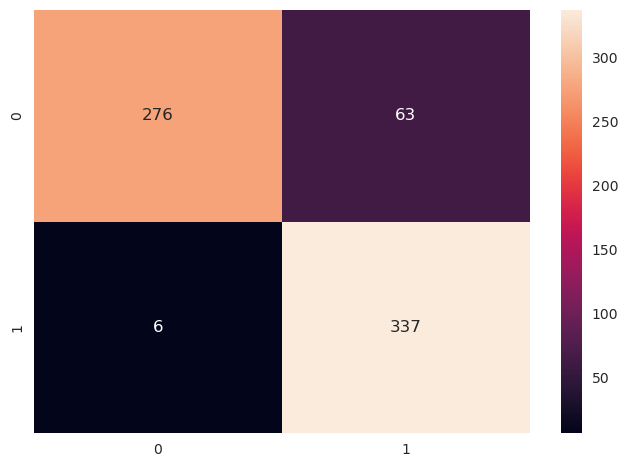

In [97]:
print("##### KNeighbors #########")

print(f'The final test accuracy of the model is {accuracy_test_3_final}')
print(f'The final test f1_score of the model is {f1_test_3_final}')

sb.heatmap(matrix_test_3_final, annot = True, fmt = 'd')
plt.show()

## ÁRBOLES DE DECISIÓN - Clasificación

Crea niveles en los que se toman decisiones según una sola variable (más cerca a la raíz las más relacionadas con el output)

Se toman decisiones según 1 de 3 mecanismos de separación:

- **Tasa de Error de Clasificación**:

$$ \text{Error Rate} = 1 - \text{max}_{k}(\text{P}_{mk}) $$

- **GINI**:

- **Entropy**:



### Conceptos De Árboles Para Entender  Pruning

- Semilla, primera variable.

- Nodos intermedios, ramas.

- Nodo terminal, Hojas.


### Hiperparámeteros Árbol

- Mínimo de individuos para bifurcación (H1)

- Máximo de Hojas en el árbol (H2)

- Mínimo de individuos para crear una hoja (H3)

- Criterio de intersección (H4)



In [98]:
modelo_4 = DecisionTreeClassifier()

hiperparam_grid_Tree = {'criterion': ['log_loss', 'gini','entropy'],
                        'max_depth': [5,15,20,25,30],
                        'min_samples_split': [2,3,4,5],
                        'max_leaf_nodes': [None, 10,12,15]}

In [99]:
classifier_e = GridSearchCV(estimator = modelo_4,
                            param_grid=hiperparam_grid_Tree,
                            cv=3)

classifier_e.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['log_loss', 'gini', 'entropy'],
                         'max_depth': [5, 15, 20, 25, 30],
                         'max_leaf_nodes': [None, 10, 12, 15],
                         'min_samples_split': [2, 3, 4, 5]})

In [100]:
validation = pd.concat([pd.DataFrame(classifier_e.cv_results_['params']),
                        pd.DataFrame(classifier_e.cv_results_['mean_test_score'],
                                    columns=['Accuracy'])], axis=1)

validation.sort_values('Accuracy', ascending=False)

criterion  max_depth  max_leaf_nodes  min_samples_split  Accuracy
144      gini         30             NaN                  2  0.925334
64   log_loss         30             NaN                  2  0.924845
48   log_loss         25             NaN                  2  0.924682
192   entropy         20             NaN                  2  0.920932
112      gini         20             NaN                  2  0.920768
..        ...        ...             ...                ...       ...
171   entropy          5            12.0                  5  0.779590
10   log_loss          5            12.0                  4  0.779590
8    log_loss          5            12.0                  2  0.779590
9    log_loss          5            12.0                  3  0.779590
11   log_loss          5            12.0                  5  0.779590

[240 rows x 5 columns]

##### Tree #########
The final test accuracy of the model is 0.9310850439882697
The final test f1_score of the model is 0.9357045143638851


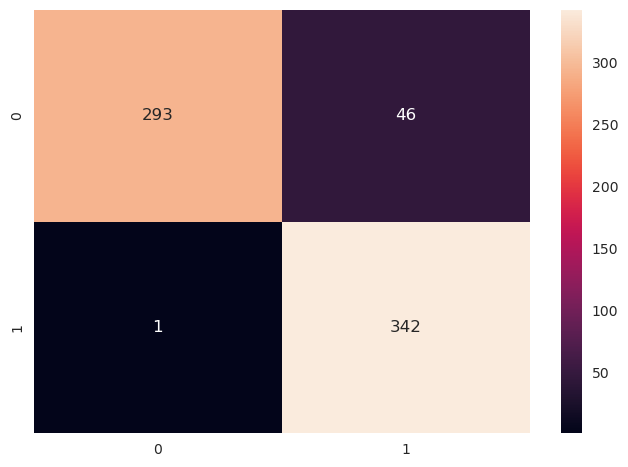

In [101]:
modelo_4_final = classifier_e.best_estimator_

#Calcular medidas
y_pred_test_4_final = modelo_4_final.predict(x_test)
accuracy_test_4_final = accuracy_score(y_test, y_pred_test_4_final)
matrix_test_4_final = confusion_matrix(y_test, y_pred_test_4_final)
f1_test_4_final = f1_score(y_test, y_pred_test_4_final)

#Imprimir resultados
print("##### Tree #########")

print(f'The final test accuracy of the model is {accuracy_test_4_final}')
print(f'The final test f1_score of the model is {f1_test_4_final}')

sb.heatmap(matrix_test_4_final, annot = True, fmt = 'd')
plt.show()

## Modelos De Ensamble

Combinan múltiples modelos en uno. 

### Bagging

- Bootstraping (Distintos  modelos)

- Random Forest (Distintos árboles)

- Extra Trees Ensemble (Bosque, con árboles aparte)

Se ajustan múltiples modelos, cad uno con un subconjunto diferente de datos.

Todos los modelos predicen por su cuenta, y se promedia la predicción dar la final


### Boosting

Los modelos no se entrenan en paralelo. Se entrenan secuencialmente distintos modelos para corregir los errores

![Boosting](data/boosting.png)


### Stacking

Utiliza todos los datos para ajustar diferentes modelos 




## Random Forest

Pasa una variable por todos los árboles y da una decisión final con la moda de los outputs

**Hiper parámetros**:
    
    Mismos de un árbol

- Criterio de separación

- Profundidad

- Muestras mínimas separación

- Hojas

- Cantidad de árboles

In [102]:
modelo_5 = RandomForestClassifier(random_state=16)
hiperp_grid_random_forest = {'n_estimators': [100,200,300,400,500],
                             'criterion': ['gini', 'entropy', 'log_loss'],
                             'max_depth': [5, 15, 20, 25, 30, 35],
                             'min_samples_split': [2,3,4,5],
                             'max_leaf_nodes':[None, 10,12,15]}

In [103]:
classifier_e = GridSearchCV(estimator=modelo_5,
                            param_grid=hiperp_grid_random_forest,
                            cv = 3)
# classifier_e.fit(x_train, y_train)

In [ ]:
modelo_5_final = classifier_e.best_estimator_

#Calcular medidas
y_pred_test_5_final = modelo_5_final.predict(x_test)
accuracy_test_5_final = accuracy_score(y_test, y_pred_test_5_final)
matrix_test_5_final = confusion_matrix(y_test, y_pred_test_5_final)
f1_test_5_final = f1_score(y_test, y_pred_test_5_final)

#Imprimir resultados
print("##### Tree #########")

print(f'The final test accuracy of the model is {accuracy_test_5_final}')
print(f'The final test f1_score of the model is {f1_test_5_final}')

sb.heatmap(matrix_test_5_final, annot = True, fmt = 'd')
plt.show()

## AdaBoost (Adaptative Boosting)

También basado en árboles.

Mismos hiperparámetros de Random Forest